In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.dropna(inplace=True)

In [4]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [5]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

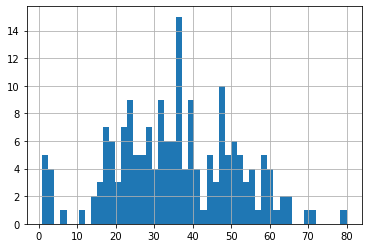

In [8]:
df['age'].hist(bins=50);

In [9]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)
X = df[['pclass', 'sex', 'age']].copy()

In [10]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [11]:
X['sex'] = lb.fit_transform(X['sex'])

In [12]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [13]:
y = subset['survived']

In [14]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print("\n*****************************\n")
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9528

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.96      0.98      0.97        88

    accuracy                           0.95       127
   macro avg       0.95      0.94      0.94       127
weighted avg       0.95      0.95      0.95       127


Confusion Matrix: 
 [[35  4]
 [ 2 86]]

ROC AUC: 0.9374

Average Accuracy: 	 0.8186
Accuracy SD: 		 0.1090

*****************************

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.78      0.89      0.83        35

    accuracy                           0.76        55
   macro avg       0.75      0.72      0.73        55
weighted avg       0.76      0.76      0.75        55


Confusion Matrix: 
 [[11  9]
 [ 4 31]]

ROC AUC: 0.7179

